In [46]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [47]:
data = pd.read_csv('GLD.csv')

In [48]:
results = smf.ols('ln_gld ~ ln_sp500', data=data).fit()

In [49]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 ln_gld   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     760.9
Date:                Wed, 17 Jun 2020   Prob (F-statistic):          3.19e-153
Time:                        14:45:42   Log-Likelihood:                -1232.0
No. Observations:                3919   AIC:                             2468.
Df Residuals:                    3917   BIC:                             2480.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.5760      0.112     14.128      0.0

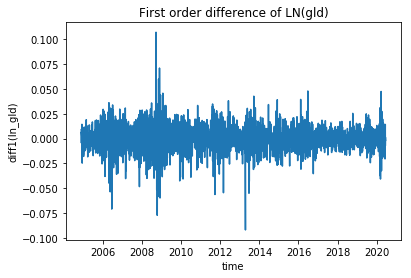

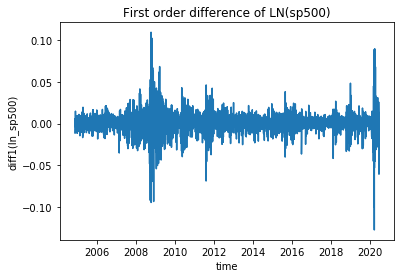

In [50]:
diff1lngld = data['ln_gld'].diff()
y= diff1lngld
x= pd.to_datetime(data['date'])
plt.plot(x,y)
plt.title('First order difference of LN(gld)');
plt.ylabel('diff1(ln_gld)');
plt.xlabel('time');
plt.show();


diff1lnsp500 = data['ln_sp500'].diff()
y= diff1lnsp500
x= pd.to_datetime(data['date'])
plt.title('First order difference of LN(sp500)');
plt.ylabel('diff1(ln_sp500)');
plt.xlabel('time');

plt.plot(x,y);
plt.show();

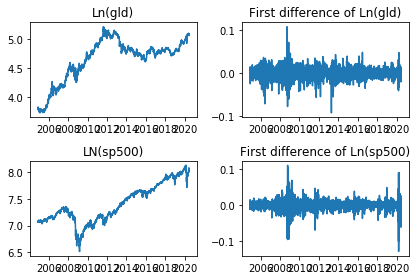

In [51]:
fig, axs = plt.subplots(2,2);
axs[0, 0].plot(pd.to_datetime(data['date']), data['ln_gld'])
axs[0, 0].set_title('Ln(gld)');
axs[0, 1].plot(pd.to_datetime(data['date']), diff1lngld);
axs[0, 1].set_title('First difference of Ln(gld)');
axs[1, 0].plot(pd.to_datetime(data['date']), data['ln_sp500']);
axs[1, 0].set_title('LN(sp500)');
axs[1, 1].plot(pd.to_datetime(data['date']), diff1lnsp500);
axs[1, 1].set_title('First difference of Ln(sp500)');
fig.tight_layout();

In [52]:
from statsmodels.tsa.stattools import adfuller
#First value is NaN so we have to skip it in the test
result = adfuller(diff1lngld.iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    

result = adfuller(diff1lnsp500.iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -63.593309
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
ADF Statistic: -15.079233
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [53]:
sm.stats.stattools.durbin_watson(results.resid,axis=0)

0.0014143612512180607

Text(0.5, 1.0, 'Residuals of OLS Regression over time')

Text(0, 0.5, 'residuals')

Text(0.5, 0, 'time')

Text(0.5, 1.0, 'Residuals of OLS Regression over fitted values')

Text(0, 0.5, 'residuals')

Text(0.5, 0, 'fitted values')

0.0014143612512180607

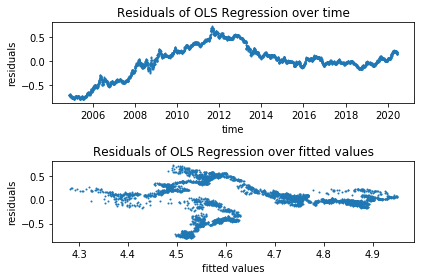

In [54]:
fig, axs = plt.subplots(2,1);

y=results.resid
x= pd.to_datetime(data['date'])
axs[0].scatter(x,y,s=1)
axs[0].set_title('Residuals of OLS Regression over time');
axs[0].set_ylabel('residuals');
axs[0].set_xlabel('time');
y=results.resid
x= results.fittedvalues
axs[1].scatter(x,y,s=1)
axs[1].set_title('Residuals of OLS Regression over fitted values');
axs[1].set_ylabel('residuals');
axs[1].set_xlabel('fitted values');
fig.tight_layout();

sm.stats.stattools.durbin_watson(results.resid,axis=0)

In [55]:
result = adfuller(results.resid)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.067285
p-value: 0.257871
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [56]:
glddata = pd.DataFrame()
glddata['x']=data['ln_gld']
glddata['y']=data['ln_sp500']

In [58]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
cointtest=coint_johansen(glddata,0,1)

print('Trace Statistic:') 
print(cointtest.lr1) 
print('Critical Values Trace Statistic [90% 95% 99%]:')
print(cointtest.cvt)
print('Maximum Eigenvalue Statistic') 
print(cointtest.lr2)
print('Critical Values Maximum Eigenvalue Statistic [90% 95% 99%]')
print(cointtest.cvm)

Trace Statistic:
[5.39157811 0.55165002]
Critical Values Trace Statistic [90% 95% 99%]:
[[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Maximum Eigenvalue Statistic
[4.8399281  0.55165002]
Critical Values Maximum Eigenvalue Statistic [90% 95% 99%]
[[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


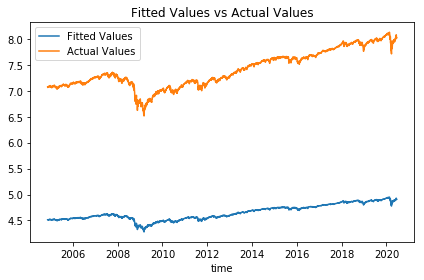

In [61]:
fig, axs = plt.subplots(1,1);

y1=results.fittedvalues
y2=data['ln_sp500']
x= pd.to_datetime(data['date'])
axs.plot(x,y1, label='Fitted Values')
axs.plot(x,y2, label='Actual Values')
axs.set_title('Fitted Values vs Actual Values');
axs.set_xlabel('time');
axs.legend(loc='upper left')

fig.tight_layout();

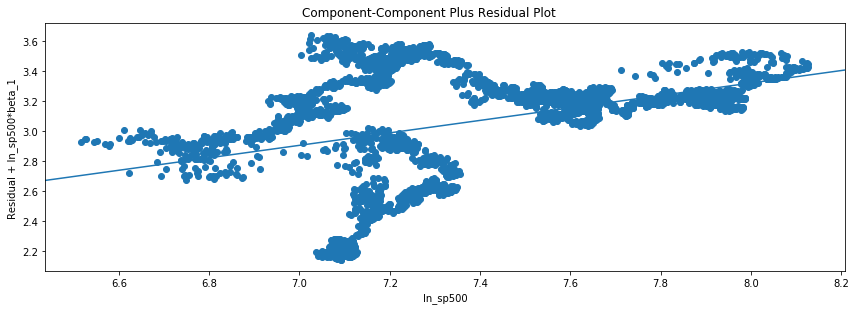

In [62]:
fig = plt.figure(figsize=(12, 8))
fig = sm.graphics.plot_ccpr_grid(results, fig=fig)